start: 0, end: 56, days: 56, start*24: 0, end*24: 1344
start: 56, end: 111, days: 55, start*24: 1344, end*24: 2664
start: 111, end: 175, days: 64, start*24: 2664, end*24: 4200
start: 175, end: 231, days: 56, start*24: 4200, end*24: 5544
--------------------------------------------------------------------------------
start: 0, end: 56, days: 56, start*24: 0, end*24: 1344
start: 56, end: 111, days: 55, start*24: 1344, end*24: 2664
start: 111, end: 175, days: 64, start*24: 2664, end*24: 4200
start: 175, end: 231, days: 56, start*24: 4200, end*24: 5544
--------------------------------------------------------------------------------
start: 0, end: 56, days: 56, start*24: 0, end*24: 1344
start: 56, end: 111, days: 55, start*24: 1344, end*24: 2664
start: 111, end: 175, days: 64, start*24: 2664, end*24: 4200
start: 175, end: 231, days: 56, start*24: 4200, end*24: 5544
--------------------------------------------------------------------------------


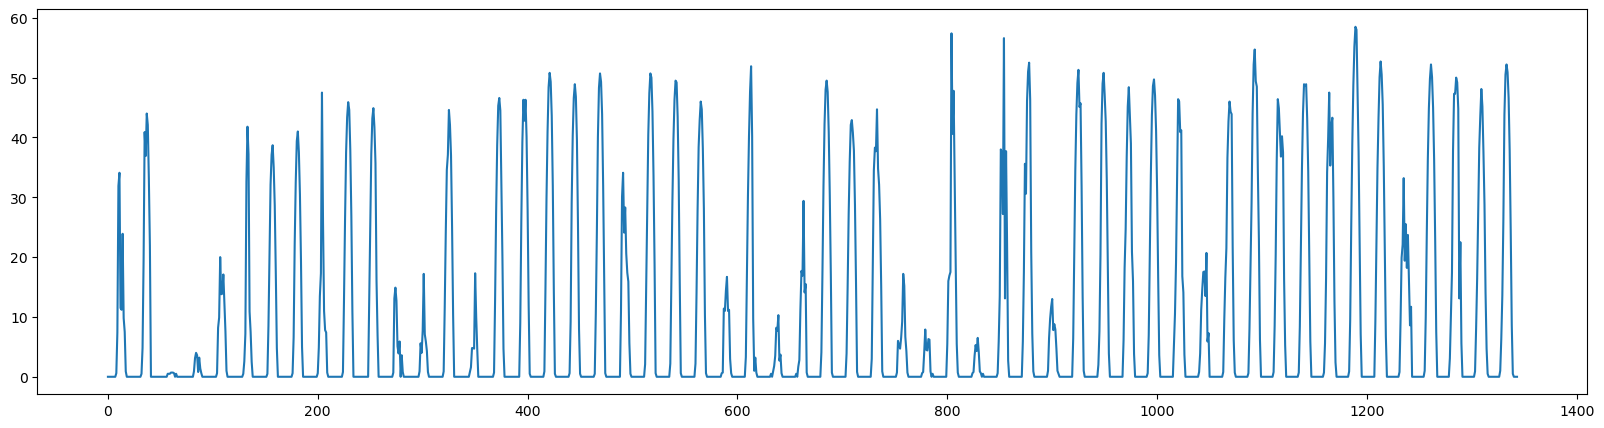

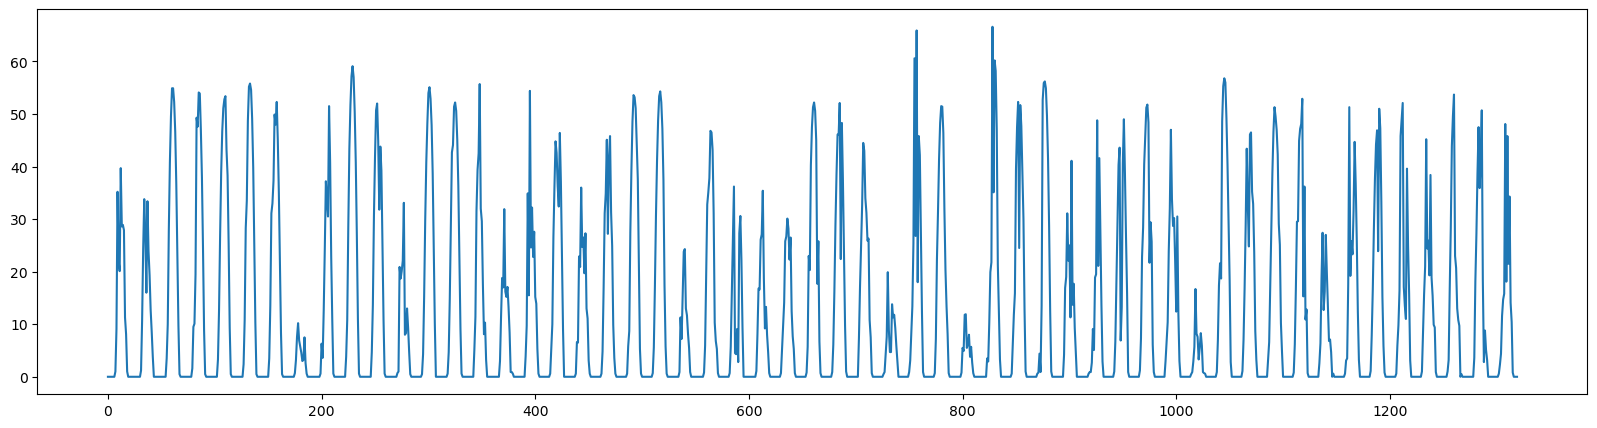

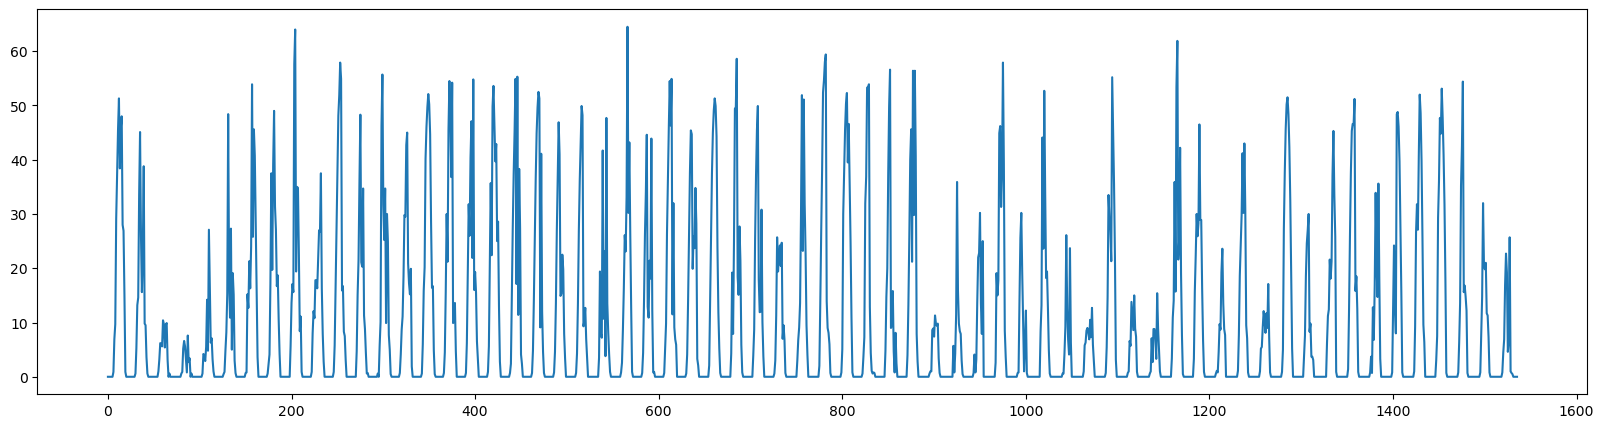

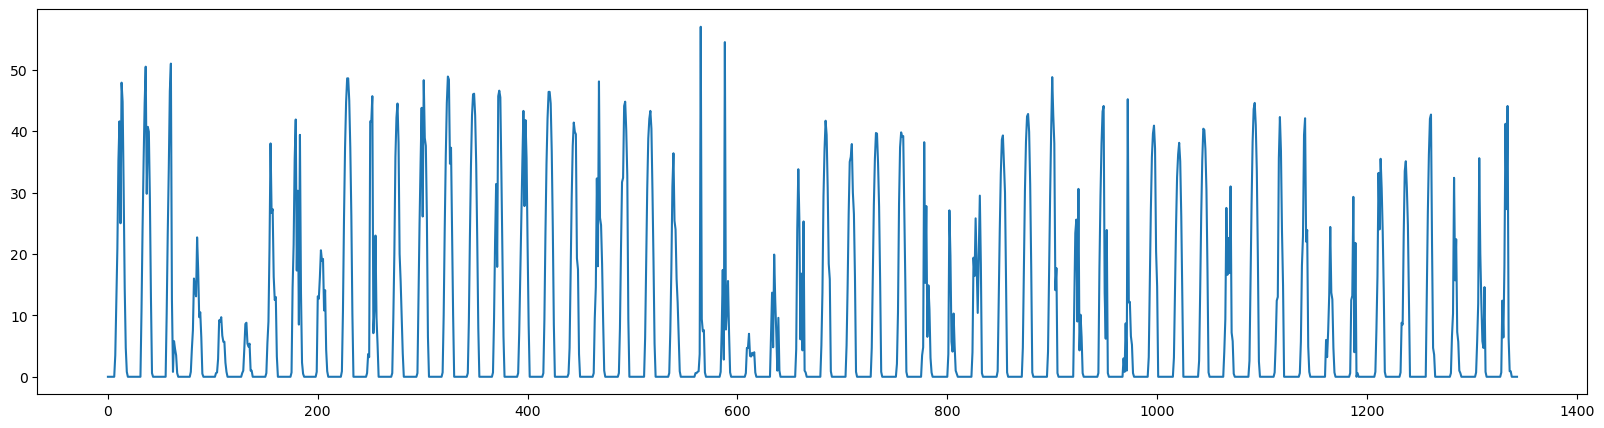

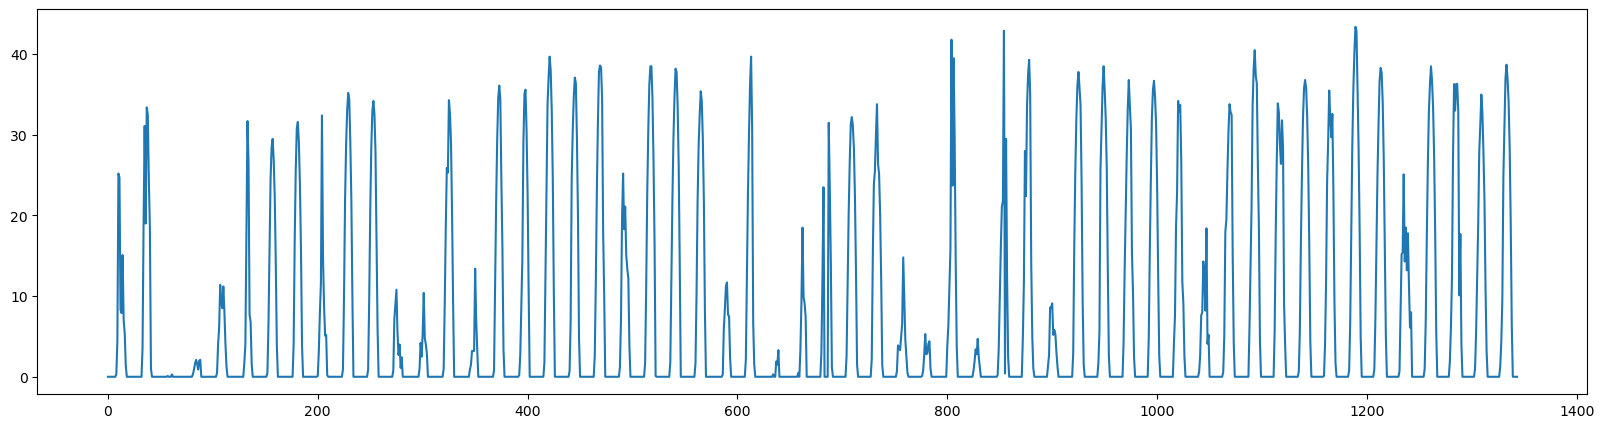

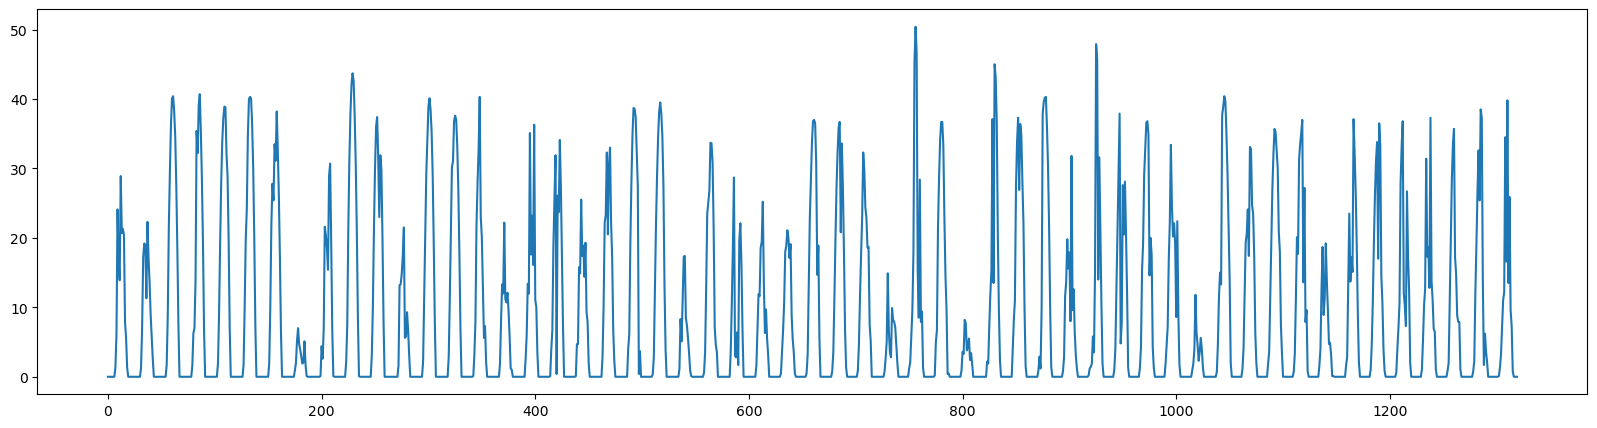

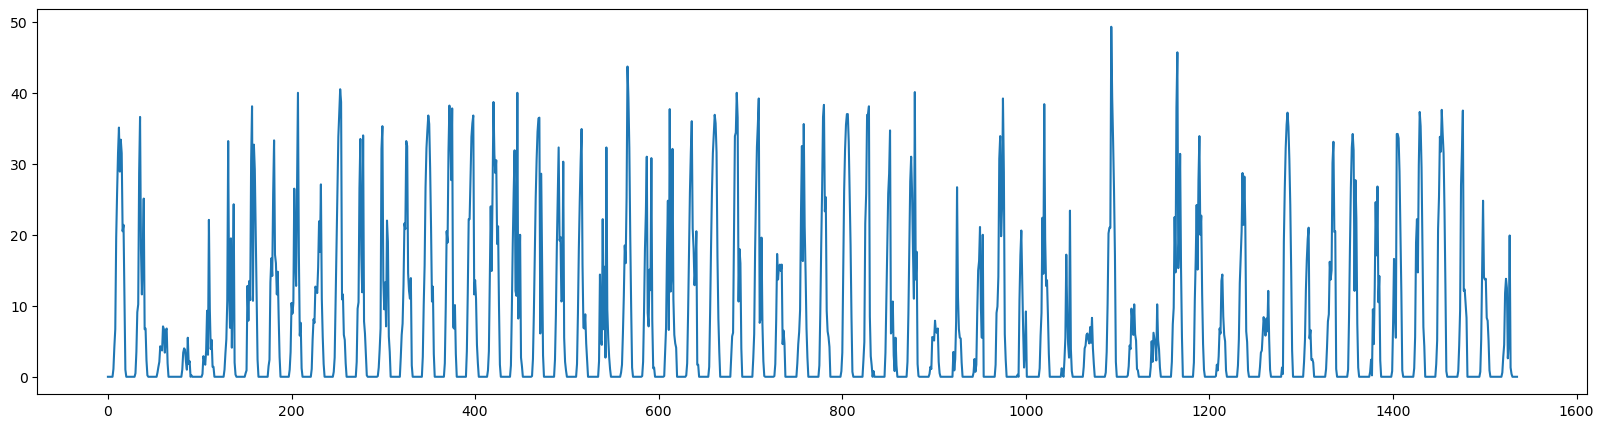

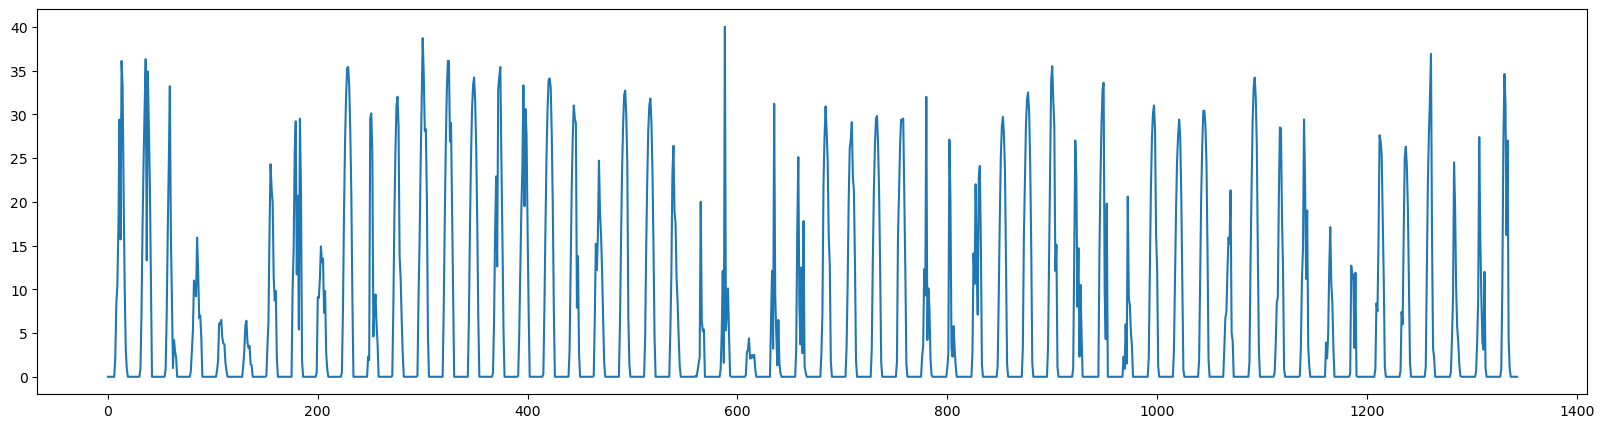

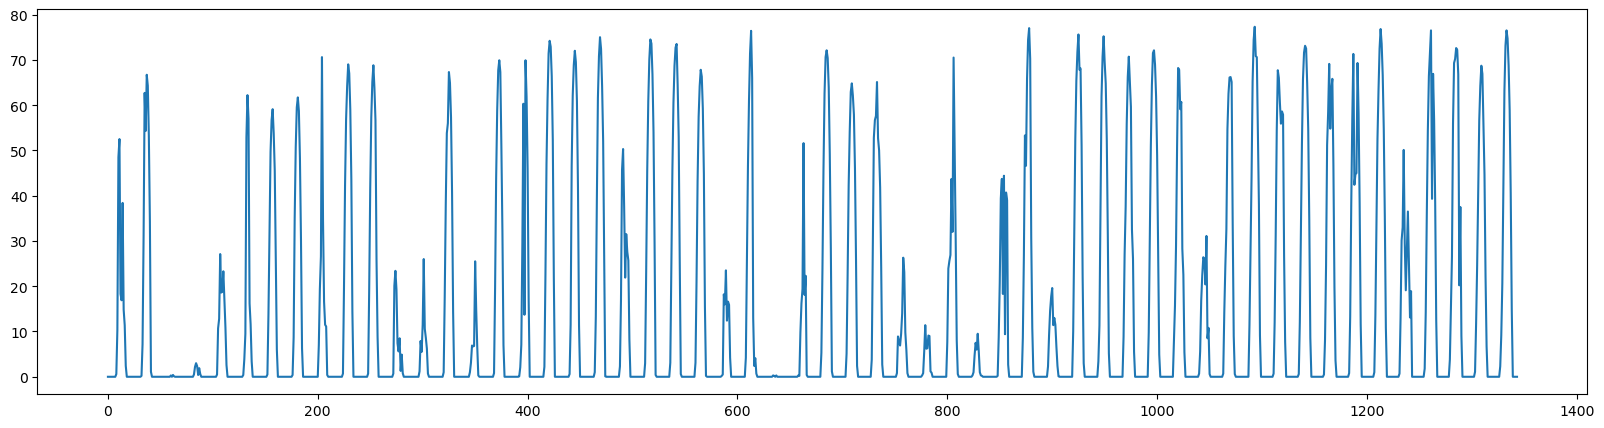

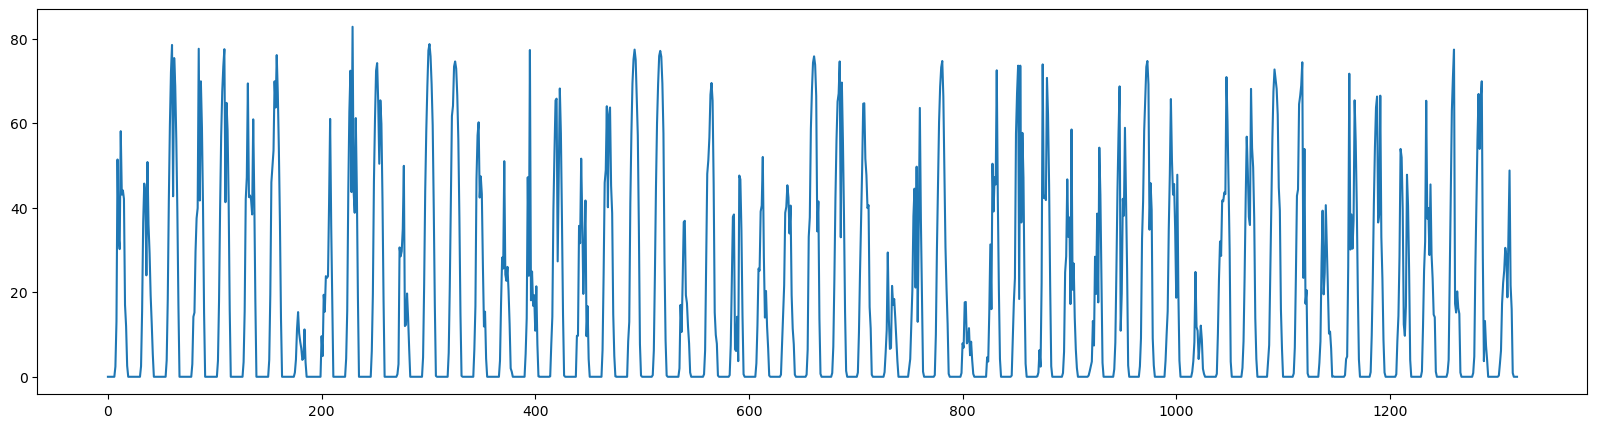

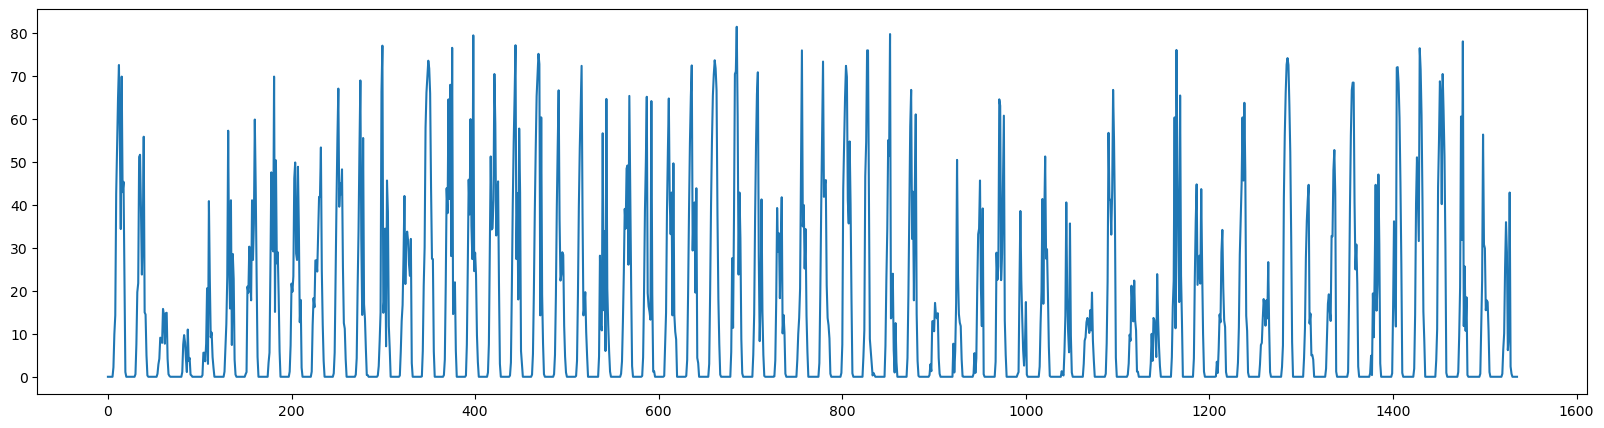

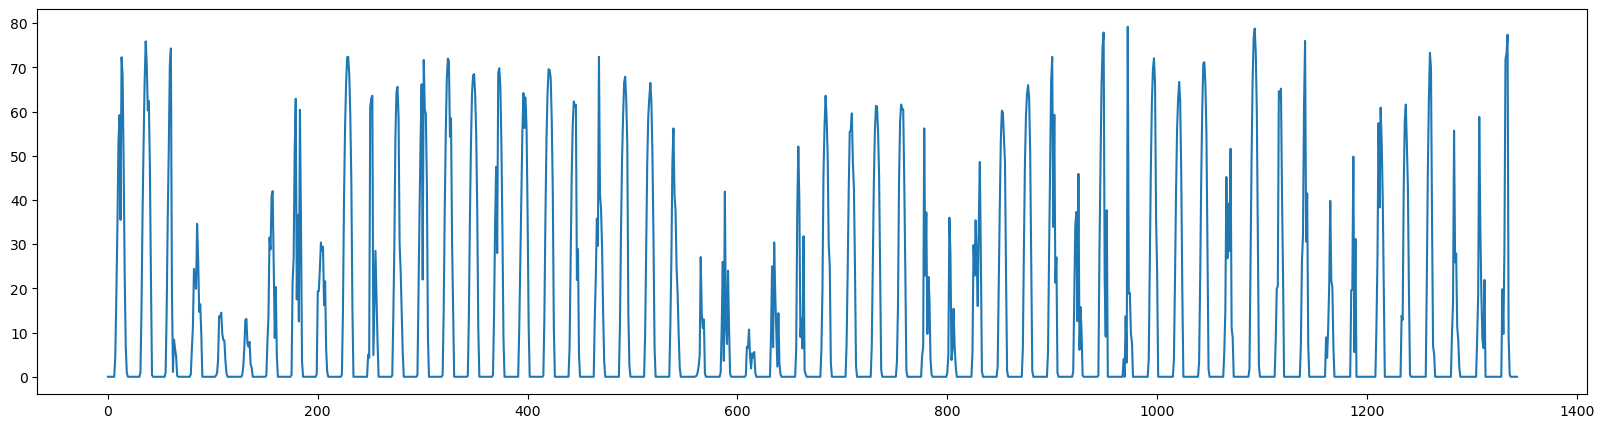

In [86]:
def get_label_interval(X):
    label_interval = []
    for i in range(1, 13):
        cnt = 0
        for idx in X.index:
            if '21{0:0>2}'.format(i) in str(idx):
                cnt+=1
        label_interval.append(cnt)
    return label_interval


def plot(interval, i, data, data_, building, f):
    start = sum(interval[0:i])
    end = sum(interval[0:i+3])
    days = sum(interval[i:i+3])
    print(f'start: {start}, end: {end}, days: {days}, start*24: {start*24}, end*24: {end*24}')
    
    fig = plt.figure(figsize=(20, 5))
    plt.plot(data[start*24:end*24])
    
    s = np.mean((data[start*24:end*24]))
    # calculate the mean of the data which is bigger than 0
    m = np.mean(data[start*24:end*24][data[start*24:end*24] > 0])
    
    # print(f'{i+1}~{i+3} month: {round(s,4)}   |   {round(m,4)}', file = f)
    print(f'{i+1}~{i+3} month: {round(s,4)}', file = f)
    
    # save the figure
    # plt.savefig(f'./experiment_outputs/data_analysis/{data_}_{building}_{i+1}~{i+3}month.png')


def check(building):
    load = pd.read_csv(f'./processed_data/load/Y_load_231days_{building}.csv', index_col=0)
    
    pv = pd.read_csv(f'./processed_data/pv/Y_pv_231days_{building}.csv', index_col = 0)
    pv = pv.iloc[:, 0:24]

    net_load = pd.read_csv(f'./processed_data/netload/Y_netload_231days_{building}.csv', index_col=0 )
    
    l = len(load)

    # for i in range(l):
    #     pv_row = pv.iloc[i]
    #     netload_row = net_load.iloc[i]
    #     load_row = load.iloc[i]
    #     for j in range(24):
    #         if pv_row[j] < 0:
    #             pv_row[j] = 0
    #         if int(load_row[j]) != int(pv_row[j] + netload_row[j]):
    #             print(f'idx: {i},     j: {j},    X_row: {load_row[j]},     pv: {pv_row[j]},     netload: {netload_row[j]},    pv+netload: {pv_row[j] + netload_row[j]}')
    
    
    interval = get_label_interval(load)
    load = load.values.reshape(-1)
    pv = pv.values.reshape(-1)
    netload = net_load.values.reshape(-1)
    
    data = pv
    data_ = 'pv'
    f = open(f'./experiment_outputs/data_analysis/mean_of_dataXXXXXX.txt', 'a')
    print(f'{building}\n', file = f)
    print(f'Mean of {data_}', file = f)
    plot(interval, 0, data, data_, building, f)
    plot(interval, 3, data, data_, building, f)
    plot(interval, 6, data, data_, building, f)
    plot(interval, 9, data, data_, building, f)
    print('-'*80)
    # print(f'Mean of the total {data_}: {round(np.mean(data),4)}   |   {round(np.mean(data[data > 0]), 4)}', file = f)
    print(f'Mean of the total {data_}: {round(np.mean(data),4)}', file = f)
    print('-'*80, file = f)
    f.close()
    
    

        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


check('RISE')
check('DORM')
check('MACH')

    

In [87]:
feature_list = ['DS', 'SR', ['TM_6', 'TM_9', 'TM_12', 'TM_15', 'TM_18'], ['WS_6', 'WS_9', 'WS_12', 'WS_15', 'WS_18'], ['SK_6', 'SK_9', 'SK_12', 'SK_15', 'SK_18'], ['PP_6', 'PP_9', 'PP_12', 'PP_15', 'PP_18'], ['PR_9', 'PR_15', 'PR_21']]
for building in ['RISE', 'DORM', 'MACH']:
    for feature in feature_list:
        if type(feature) == list:
            drop_features = feature
        else:
            drop_features = []
            drop_features.append(feature)
        print(f'building: {building}, drop_features: {drop_features}')

building: RISE, drop_features: ['DS']
building: RISE, drop_features: ['SR']
building: RISE, drop_features: ['TM_6', 'TM_9', 'TM_12', 'TM_15', 'TM_18']
building: RISE, drop_features: ['WS_6', 'WS_9', 'WS_12', 'WS_15', 'WS_18']
building: RISE, drop_features: ['SK_6', 'SK_9', 'SK_12', 'SK_15', 'SK_18']
building: RISE, drop_features: ['PP_6', 'PP_9', 'PP_12', 'PP_15', 'PP_18']
building: RISE, drop_features: ['PR_9', 'PR_15', 'PR_21']
building: DORM, drop_features: ['DS']
building: DORM, drop_features: ['SR']
building: DORM, drop_features: ['TM_6', 'TM_9', 'TM_12', 'TM_15', 'TM_18']
building: DORM, drop_features: ['WS_6', 'WS_9', 'WS_12', 'WS_15', 'WS_18']
building: DORM, drop_features: ['SK_6', 'SK_9', 'SK_12', 'SK_15', 'SK_18']
building: DORM, drop_features: ['PP_6', 'PP_9', 'PP_12', 'PP_15', 'PP_18']
building: DORM, drop_features: ['PR_9', 'PR_15', 'PR_21']
building: MACH, drop_features: ['DS']
building: MACH, drop_features: ['SR']
building: MACH, drop_features: ['TM_6', 'TM_9', 'TM_12',

In [88]:
6743/2429

2.776039522437217

In [89]:
7173/2111

3.3979156797726198

In [90]:
8022/2302

3.484795829713293

In [91]:
(5.4974-5.4800)/5.4974

0.0031651326081419246

In [91]:
(9.3209-9.1188)/9.3209

KeyboardInterrupt: 

In [ ]:
(8.7773-8.7200)/8.7773

0.006528203433857756

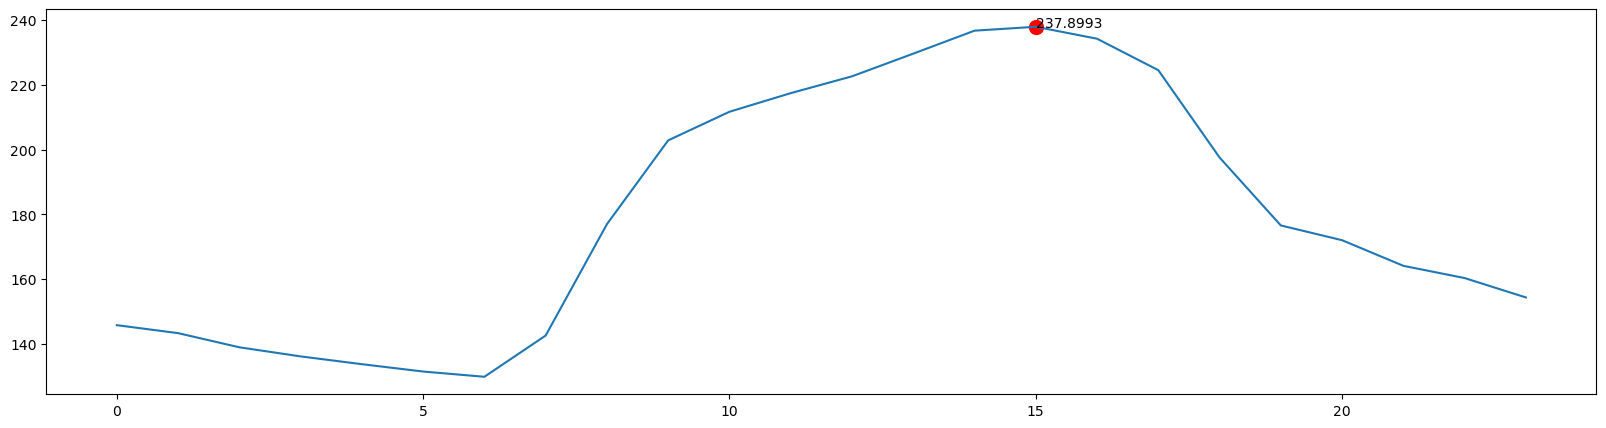

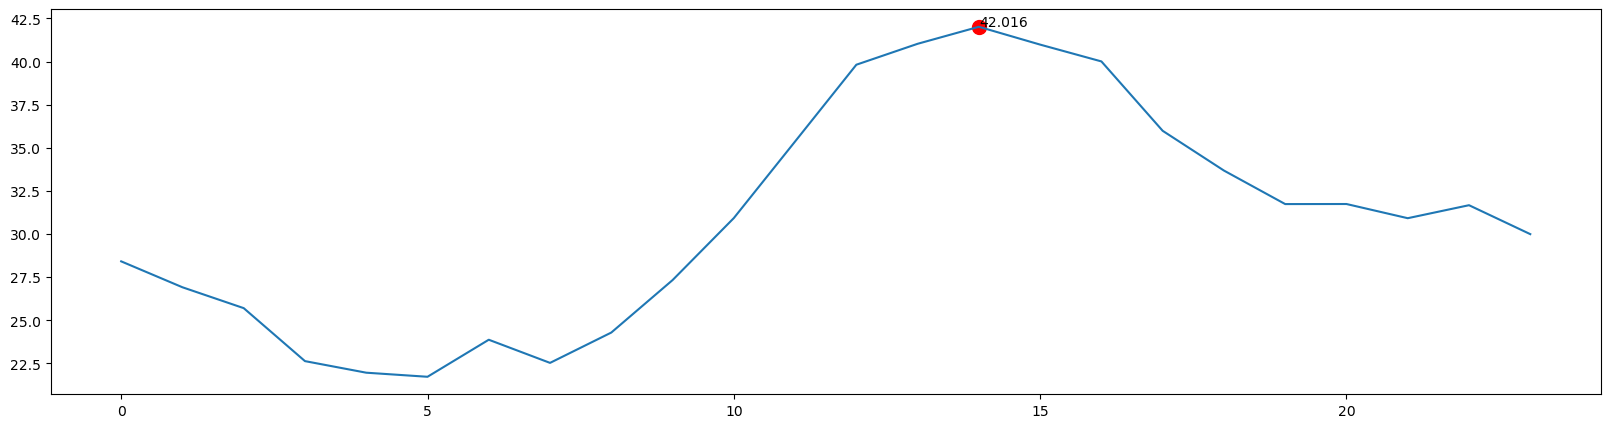

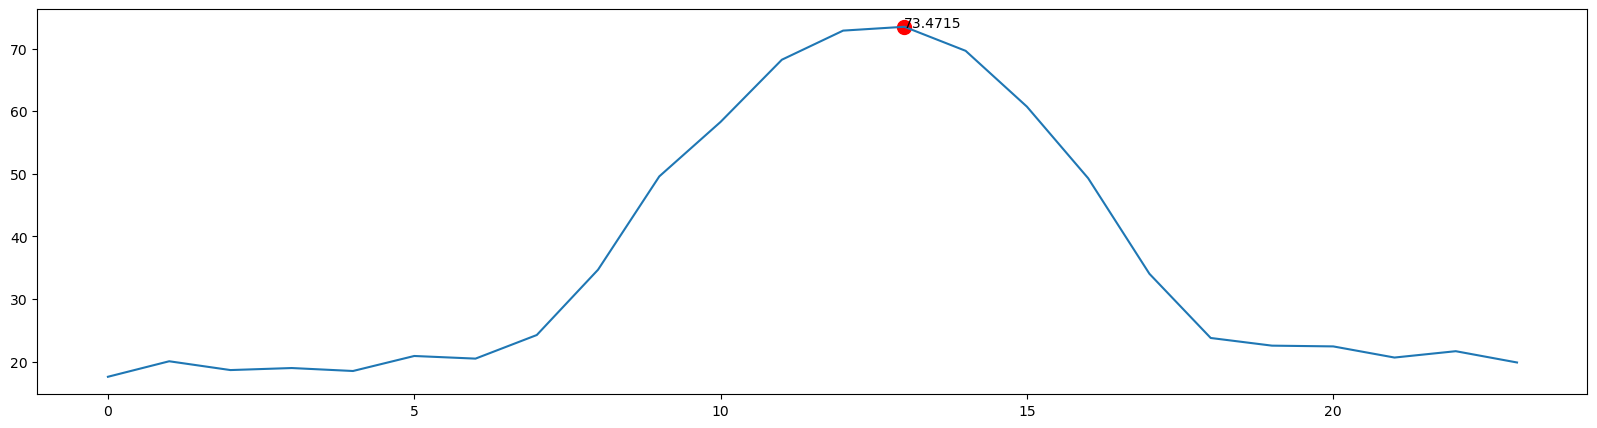

In [99]:
def get_label_interval(X):
    label_interval = []
    for i in range(1, 13):
        cnt = 0
        for idx in X.index:
            if '21{0:0>2}'.format(i) in str(idx):
                cnt+=1
        label_interval.append(cnt)
    return label_interval


def plot(interval, i, data, data_, building, f):
    # start = sum(interval[0:i])
    # end = sum(interval[0:i+3])
    # days = sum(interval[i:i+3])
    # print(f'From {i+1} month to {i+3} month', file = f)
    # print(f'building: {building}, data: {data_}')
    # print(f'start: {start}, end: {end}, days: {days}')
    
    start = 0
    # start = 0
    end = 184
    
    
    # normalize the data as z score
    data = data[start:end, :]
    # data = (data - np.mean(data)) / np.std(data)
    

    std = np.std(data, axis = 0)
    mean = np.mean(data)
    
    std_peak_loc = np.argmax(std)
    std_peak_val = std[std_peak_loc]
    
    std_mean = np.mean(std)
    
    print(f'Mean of the total {data_}: {mean}', file = f)
    print(f'Mean of std: {std_mean}', file = f)
    
    # plot the graph of 's' and mark the peak
    fig = plt.figure(figsize=(20, 5))
    plt.plot(std)
    
    plt.scatter(std_peak_loc, std_peak_val, c='r', s=100)
    # represent the std_peak_val as a text
    plt.text(std_peak_loc, std_peak_val, f'{round(std_peak_val, 4)}', fontsize=10)
    
    print(f'Std/Mean: {std_mean/mean}', file = f)
    print(f'Peak of std: {std_peak_loc}th hour, {round(std_peak_val, 4)}', file = f)    
    print(f'Peak std/Mean: {std_peak_val/mean}', file = f)

    # plt.savefig(f'./experiment_outputs/data_analysis/compare_std/{data_}_{building}_{i+1}~{i+3}month.png')
    plt.savefig(f'./experiment_outputs/data_analysis/compare_std/{data_}_{building}_no_norm.png')
    
    return std_mean


def check(building):
    load = pd.read_csv(f'./processed_data/load/Y_load_231days_{building}.csv', index_col=0)
    load = load.iloc[:, 0:24]
    
    pv = pd.read_csv(f'./processed_data/pv/Y_pv_231days_{building}.csv', index_col = 0)
    pv = pv.iloc[:, 0:24]

    net_load = pd.read_csv(f'./processed_data/netload/Y_netload_231days_{building}.csv', index_col=0 )
    net_load = net_load.iloc[:, 0:24]
    
    l = len(load)

    interval = get_label_interval(load)
    load = load.values
    pv = pv.values
    netload = net_load.values
    
    d = {'pv': pv, 'netload': netload, 'load': load}
    
    # for data_ in ['pv', 'netload', 'load']:
    for data_ in ['netload']:
        data = d[data_]
        f = open(f'./experiment_outputs/data_analysis/compare_std/description_no_norm.txt', 'a')
        print(f'{building}\n', file = f)
        print(f'>>> {data_}', file = f)
        std_mean, mean = plot(interval, 9, data, data_, building, f)
        print('-'*80, file = f)
        f.close()
        
    

        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


check('RISE')
check('DORM')
check('MACH')



In [ ]:
def get_label_interval(X):
    label_interval = []
    for i in range(1, 13):
        cnt = 0
        for idx in X.index:
            if '21{0:0>2}'.format(i) in str(idx):
                cnt+=1
        label_interval.append(cnt)
    return label_interval


def plot(interval, i, data, data_, building, f):
    # start = sum(interval[0:i])
    # end = sum(interval[0:i+3])
    # days = sum(interval[i:i+3])
    # print(f'From {i+1} month to {i+3} month', file = f)
    # print(f'building: {building}, data: {data_}')
    # print(f'start: {start}, end: {end}, days: {days}')
    
    # start = 184
    start = 0
    end = 231
    
    
    # normalize the data as z score
    data = data[start:end, :]
    data = (data - np.mean(data)) / np.std(data)
    
    # get the mean of the data along the column
    s = np.mean(data, axis = 0)
    s2 = np.std(data, axis = 0)
    
    # get the location of the peak of s
    peak = np.argmax(s)
    print(peak)
    
    peak_value = s[peak]
    peak_s2 = s2[peak]
    s2_mean = s2.mean()
    print(f"std of peak: {peak_s2}\nMean of std: {s2_mean}",file = f)
    print(peak_value)
    
    # plot the graph of 's' and mark the peak
    fig = plt.figure(figsize=(20, 5))
    plt.plot(s)
    
    # mark the peak
    plt.scatter(peak, peak_value, c='r', s=100)    
    # plt.savefig(f'./experiment_outputs/data_analysis/compare_std/{data_}_{building}_{i+1}~{i+3}month.png')
    plt.savefig(f'./experiment_outputs/data_analysis/compare_std/{data_}_{building}_all_duration.png')
    
    return peak_value


def check(building):
    load = pd.read_csv(f'./processed_data/load/Y_load_231days_{building}.csv', index_col=0)
    load = load.iloc[:, 0:24]
    
    pv = pd.read_csv(f'./processed_data/pv/Y_pv_231days_{building}.csv', index_col = 0)
    pv = pv.iloc[:, 0:24]

    net_load = pd.read_csv(f'./processed_data/netload/Y_netload_231days_{building}.csv', index_col=0 )
    net_load = net_load.iloc[:, 0:24]
    
    l = len(load)

    interval = get_label_interval(load)
    load = load.values
    pv = pv.values
    netload = net_load.values
    
    d = {'pv': pv, 'netload': netload, 'load': load}
    
    # for data_ in ['pv', 'netload', 'load']:
    for data_ in ['netload']:
        data = d[data_]
        f = open(f'./experiment_outputs/data_analysis/compare_std/description_only_netload.txt', 'a')
        print(f'{building}\n', file = f)
        print(f'>>> {data_}', file = f)
        peak_value = plot(interval, 9, data, data_, building, f)
        print('-'*80)
        print(f'Peak value: {peak_value}', file = f)
        print('-'*80, file = f)
        f.close()
        
    

        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


check('RISE')
check('DORM')
check('MACH')



In [26]:
pv = 1
netload =2 
load =3 
d = {pv: 'pv', netload: 'netload', load: 'load'}

data = pv
data_ = d[data]

In [27]:
print(data, data_)

1 pv


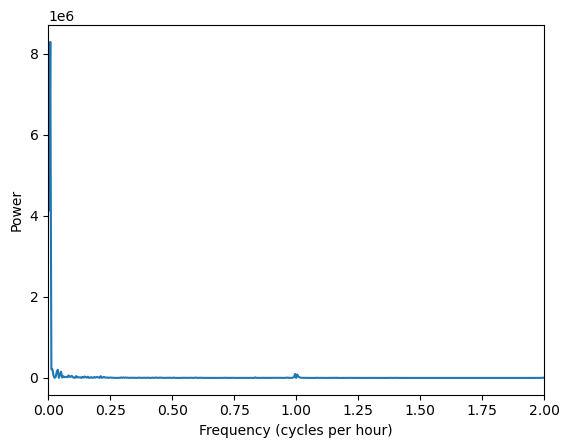

Power in 1/24~1 cycles/hour for building RISE: 1585902.8751876114


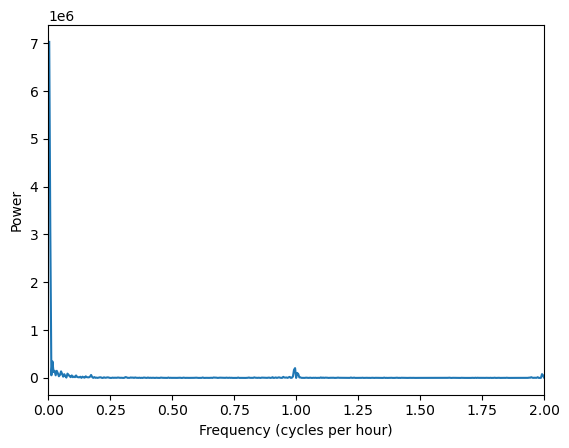

Power in 1/24~1 cycles/hour for building DORM: 2202775.418572681


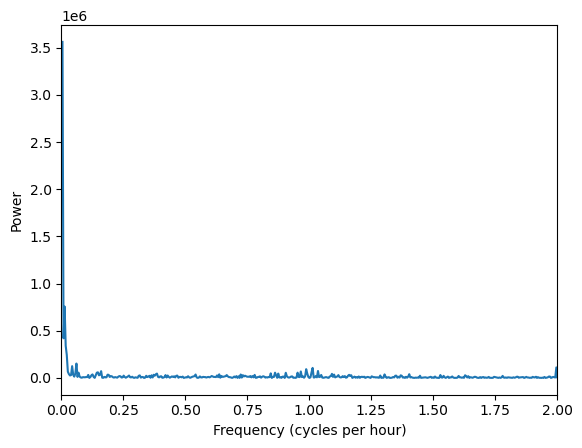

Power in 1/24~1 cycles/hour for building MACH: 3520512.405600315
{'RISE': 1585902.8751876114, 'DORM': 2202775.418572681, 'MACH': 3520512.405600315}


In [85]:
import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt
    
def program(building):
    # Load the data into a pandas dataframe
    net_load = pd.read_csv(f'./processed_data/netload/Y_netload_231days_{building}.csv', index_col=0 )
    net_load = net_load.iloc[:, 0:24]

    # Reshape the data into a 2D numpy array with shape (231, 24)
    net_load = net_load.values

    # Z-score normalization along the time axis
    net_load_mean = np.mean(net_load, axis=0)
    net_load_std = np.std(net_load, axis=0)
    net_load_norm = (net_load - net_load_mean) / net_load_std

    # Flatten the data into a 1D numpy array with shape (231*24, )
    net_load_flat = net_load_norm.reshape(-1)

    # Apply the FFT to the data
    fft_result = fft(net_load_flat)

    # Calculate the power spectrum of the FFT result
    power_spectrum = np.abs(fft_result)**2

    # Calculate the frequencies of the FFT result
    freqs = np.fft.fftfreq(len(net_load_flat))

    # Convert frequency axis from cycles per day to cycles per hour
    freqs = freqs * 24

    # Find the indices of the positive frequencies
    pos_freqs = np.where(freqs > 0)

    # Plot the power spectrum
    plt.plot(freqs[pos_freqs], power_spectrum[pos_freqs])
    plt.xlabel('Frequency (cycles per hour)')
    plt.ylabel('Power')
    plt.xlim(0,2)
    plt.show()
    
    
    # Calculate periodicity by summing up power spectrum values between 0.01 and 0.1 cycles per hour
    min_freq = 1/24
    max_freq = 1
    power1 = np.sum(power_spectrum[pos_freqs[0][(freqs[pos_freqs] >= min_freq) & (freqs[pos_freqs] <= max_freq)]]) # 1/24~1 cycles/hour
    print(f"Power in 1/24~1 cycles/hour for building {building}: {power1}")

    return power1

periodicity_dict = {}
for building in ['RISE', 'DORM', 'MACH']:
    periodicity = program(building)
    periodicity_dict[building] = periodicity
    
print(periodicity_dict)    
# https://stackoverflow.com/questions/48622933/python-performing-fft-on-csv-values-using-scipy-documentation
# https://lifelong-education-dr-kim.tistory.com/entry/Python-numpy-FFT-IFFT-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-%EC%A3%BC%EA%B8%B0%EB%B6%84%EC%84%9D

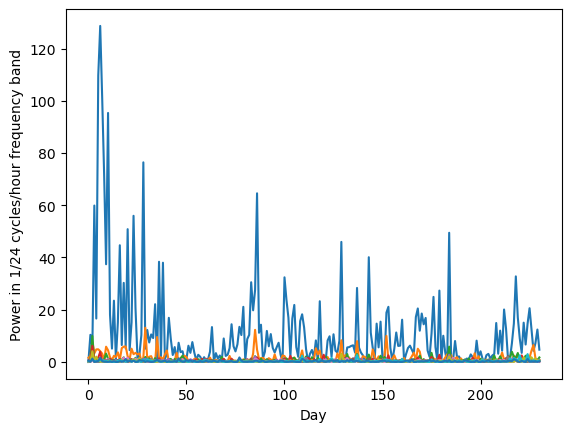

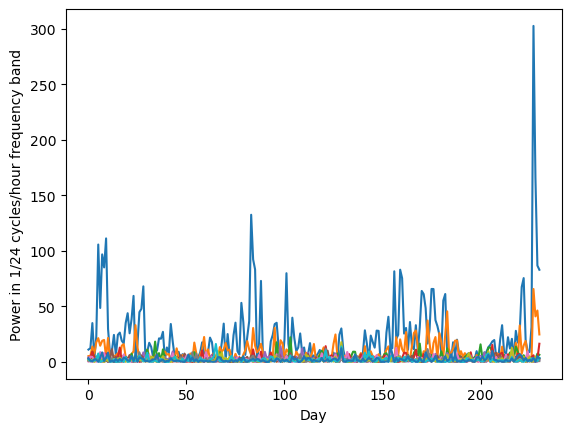

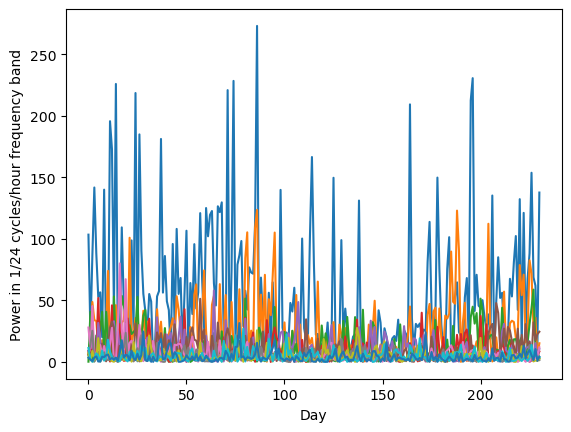

In [83]:
import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt

def program(building):
    # Load the data into a pandas dataframe
    net_load = pd.read_csv(f'./processed_data/netload/Y_netload_231days_{building}.csv', index_col=0)
    net_load = net_load.iloc[:, 0:24]

    # Reshape the data into a 2D numpy array with shape (num_days, 24)
    num_days = net_load.shape[0]
    net_load = net_load.values.reshape(num_days, 24)

    # Z-score normalization along the time axis
    net_load_mean = np.mean(net_load, axis=0)
    net_load_std = np.std(net_load, axis=0)
    net_load_norm = (net_load - net_load_mean) / net_load_std

    # Apply the FFT to each day's data
    power_spectrum = np.zeros((num_days, 24))
    for i in range(num_days):
        fft_result = fft(net_load_norm[i])
        power_spectrum[i] = np.abs(fft_result)**2

    # Calculate the power in the 1/24 cycles/hour frequency band
    freqs = np.fft.fftfreq(24)
    pos_freqs = np.where(freqs > 0)
    power = np.sum(power_spectrum[:, pos_freqs], axis=1)

    # Plot the daily power values
    plt.plot(power)
    plt.xlabel('Day')
    plt.ylabel('Power in 1/24 cycles/hour frequency band')
    plt.show()

for building in ['RISE', 'DORM', 'MACH']:
    program(building)




